# ELIZABETH EPHAIM 
# GRIP November 2022 Internship 
## Task 1 Prediction Using Supervised Merchine Learning
### Linear Regression
`We use Linear Regression when Predicting something continious,for example House Price. in this case, students scores`<br/>
`We have two Variables:`
- Independent Variable: No of hours studied.
- Dependent Variable: Students Scores.


## Importing all necessary Libraries.

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
linkUrl = "http://bit.ly/w-data"
student_data = pd.read_csv(linkUrl)
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# A great starting point for our analysis is a scatterplot. 
## This will tell us see if there's any realationship between the data in the first place.

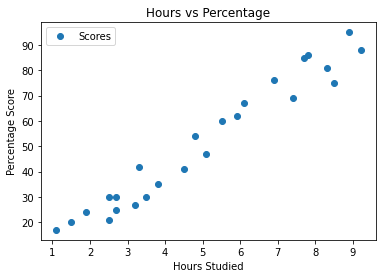

In [3]:
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

`From the above Graph, its easy to see that there is a positive linear relationship between the number of Hours used for study and the students Scores`

# Lets us classify the data into "features" (inputs) and "labels" (outputs)
- Features represent the different columns in a data set"
- Labels are also called Target, it gives the supervisory signal to the data. Targets is always only one column"
- In this data, the `Scores` column is our Label/Target (y), the `Hours` column is our features (x)

In [4]:
X = student_data.iloc[:,0:1].values
y = student_data.iloc[:,1].values.reshape(-1, 1)

#  Splitting the data set into Train and Test datasets

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=0) 

### Quick Explanation :-)
- Our dataset has twentyfive x-y pairs. We've specified the argument `test_size=5`
- The dataset is divided into a training set with `Twenty(20)` observations and a test set with `Five(5)` observations.
- The random state hyperparameter in the `train_test_split()` function controls the shuffling process`
- Above, its been set to 0, to control the shuffling process`
- By default, the random state hyperparameter is set to none, `random_state=None`which leaves the shuffling process out of control.
- When on `random_state=0` , we get the same train and test sets across different executions.

# Training the dataset
## Lets view the shape of the data

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


# Fitting the model
-  fitting the model means determining the best intercept (model.intercept_) and slope (model.coef_) values of the regression line

In [7]:
from sklearn.linear_model import LinearRegression  
LinReg = LinearRegression().fit(X_train, y_train)
LinReg.intercept_

array([2.01816004])

In [8]:
LinReg.coef_

array([[9.91065648]])

In [9]:
LinReg.score(X_train, y_train)

0.9515510725211552

`The higher the R² value, the better the fit`

# Plotting the regression line
## Plotting for the test data

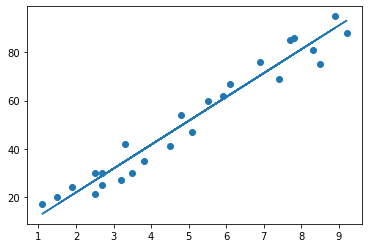

In [11]:
Regline = LinReg.coef_*X+LinReg.intercept_

plt.scatter(X, y)
plt.plot(X, Regline);
plt.show()

# Testing our data.
## We'll Test our data using  "Hours" to Predict the scores.

In [12]:
print(X_test) 
y_prediction = LinReg.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Let us Predict the score if a student studies for 9.25hours/day 

In [22]:
print( 'Hours studied: 9.25') 
print("Predicted score:", LinReg.predict(np.array(9.25).reshape(-1, 1)))

Hours studied: 9.25
Predicted score: [[93.69173249]]


# Evaluating the model
## we will evaluate the model using Mean Absolute Error
-  `MAE` is a measure of errors between paired observations expressing the same phenomenon.
-  Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time. etc
-  `MAE` is calculated as the sum of absolute errors divided by the sample size.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction)) 

Mean Absolute Error: 4.183859899002975


# Let us check the accuracy of our prediction using a graph

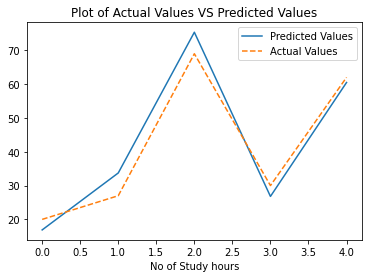

In [28]:
plt.plot(y_prediction, label="Predicted Values")
plt.plot(y_test, "--", label="Actual Values")
plt.title("Plot of Actual Values VS Predicted Values")
plt.xlabel("No of Study hours")
plt.legend()


`From the above graph, we can see that the error is not much`